In [1]:
import pandas as pd

In [2]:
df_order = pd.read_csv('../data/ecommerce/Order_1Hjune_18_noID.csv')
df_order_syn = pd.read_csv('../data/ecommerce/synthetic_Order_1Hjune_18_noID.csv')

In [3]:
df_order[df_order['Qty']<=0] # return orders

,TradesDate,ChannelType,ChannelDetail,PaymentType,ShippingType,BeforeMemberTierLevel,AfterMemberTierLevel,TsCount,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyDiscount,Status
6653,6/10/2018,Pos,C039,Cash,Store,0,0,27,-27,-39460,-39460,0,0,0,0,Return
6654,6/3/2018,Pos,A015,Cash,Store,0,0,12,-12,-18860,-18860,0,0,0,0,Return
6655,6/7/2018,Pos,A052,Cash,Store,0,0,9,-9,-9560,-9560,0,0,0,0,Return
6656,6/7/2018,Pos,C047,Cash,Store,0,0,6,-6,-7900,-7900,0,0,0,0,Return
6657,6/12/2018,Pos,A053,Cash,Store,0,0,5,-5,-6000,-6000,0,0,0,0,Return
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9383,6/1/2018,OfficialECom,MobileWeb,CreditCardOnce,Home,0,0,3,-3,-2960,-2960,0,0,0,0,Return
9384,6/1/2018,OfficialECom,AndroidApp,SevenEleven,SevenEleven,0,0,2,-2,-3060,-3060,0,0,0,0,Return
9385,6/1/2018,OfficialECom,iOSApp,Family,Family,0,0,1,-1,-1280,-1280,0,0,0,0,Return
9386,6/1/2018,OfficialECom,iOSApp,Family,Family,0,0,1,-1,-1180,-1280,100,0,100,0,Return


In [4]:
df_order.dtypes

TradesDate                object
ChannelType               object
ChannelDetail             object
PaymentType               object
ShippingType              object
BeforeMemberTierLevel      int64
AfterMemberTierLevel       int64
TsCount                    int64
Qty                        int64
TotalSalesAmount           int64
TotalPrice                 int64
TotalDiscount              int64
TotalPromotionDiscount     int64
TotalCouponDiscount        int64
TotalLoyaltyDiscount       int64
Status                    object
dtype: object

In [5]:
df_order_syn.dtypes

TradesDate                 object
ChannelType                object
ChannelDetail              object
PaymentType                object
ShippingType               object
BeforeMemberTierLevel       int64
AfterMemberTierLevel        int64
TsCount                   float64
Qty                       float64
TotalSalesAmount          float64
TotalPrice                float64
TotalDiscount             float64
TotalPromotionDiscount      int64
TotalCouponDiscount       float64
TotalLoyaltyDiscount        int64
Status                     object
dtype: object

In [6]:
# a transaction number may appear more than 1x: whenever one of the items in an order is returned/cancelled, the same transaction order is used to record
# hence number of unique transaction numbers < number of records
# here: showing the rows with duplicated transaction numbers - 6,829/28,533 (~25%)
# df_order[df_order.duplicated(subset='TransactionNum', keep=False)].sort_values(by=['TransactionNum', 'TradesDate'])


### Visualizting Categorical Cols

<Axes: xlabel='PaymentType'>

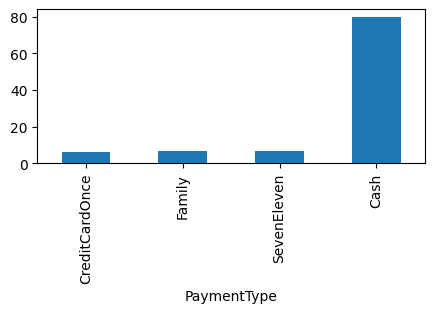

In [11]:
column_counts = df_order.groupby(['PaymentType']).size().sort_values(ascending=True)
percentages = (column_counts / column_counts.sum()) * 100
percentages.plot(kind='bar',figsize=(5,2))

<Axes: xlabel='PaymentType'>

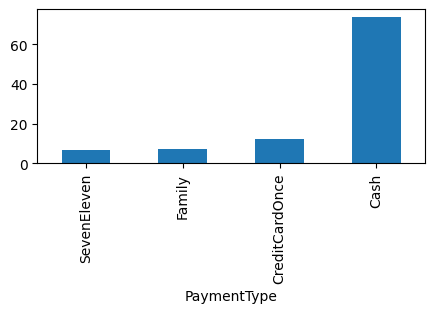

In [12]:
column_counts = df_order_syn.groupby(['PaymentType']).size().sort_values(ascending=True)
percentages = (column_counts / column_counts.sum()) * 100
percentages.plot(kind='bar',figsize=(5,2))

### Visualizing numerical columns

(-5000.0, 10000.0)

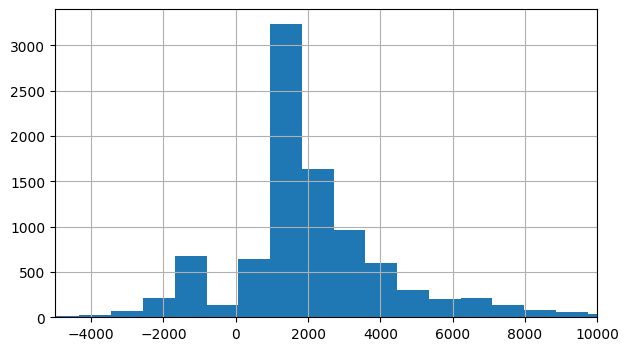

In [25]:
import matplotlib.pyplot as plt

df_order['TotalSalesAmount'].hist(bins=100, figsize=(7,4))
plt.xlim([-5000, 10000])

(-5000.0, 10000.0)

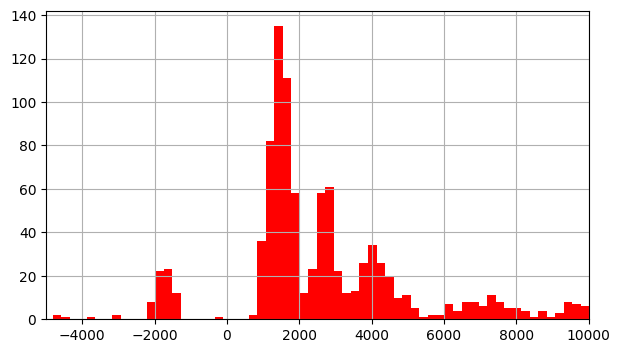

In [26]:
df_order_syn['TotalSalesAmount'].hist(bins=100, figsize=(7,4), color='red')
plt.xlim([-5000, 10000])

### Visualizing numberical column aggregate by a categorical column

In [27]:
cat_col_to_agg = 'TotalSalesAmount'
grand_total = df_order.groupby(['ChannelDetail'])\
    .aggregate({cat_col_to_agg: ['min', 'max', 'sum']})\
    .sort_values(by=(cat_col_to_agg, 'sum'),ascending=False)\
    .iloc[:,2].sum() # sum column is the 3rd operation, hence the index 2 (the col used to group is the index col)
df_agg = df_order.groupby(['ChannelDetail']).aggregate({'TotalSalesAmount': ['min', 'max', 'sum']}).sort_values(by=('TotalSalesAmount', 'sum'),ascending=False)
df_agg.columns = [f'min_{cat_col_to_agg}', f'max_{cat_col_to_agg}', f'sum_{cat_col_to_agg}']
df_agg['pct_of_grandtotal'] = round(df_agg[f'sum_{cat_col_to_agg}']/grand_total*100,2)
df_agg.reset_index(inplace=True)
df_agg

,ChannelDetail,min_TotalSalesAmount,max_TotalSalesAmount,sum_TotalSalesAmount,pct_of_grandtotal
0,A015,-18860,35820,1384950,6.69
1,MobileWeb,-6240,13890,1137986,5.50
2,iOSApp,-5940,12050,981232,4.74
3,A037,-2380,48390,730140,3.53
4,A060,-2950,32300,588210,2.84
5,C039,-39460,39460,560940,2.71
6,C040,-4140,13740,538120,2.60
7,AndroidApp,-5210,7160,495971,2.40
8,A050,-1780,30260,485760,2.35
9,C016,-2460,22290,468310,2.26


In [28]:
cat_col_to_agg = 'TotalSalesAmount'
grand_total = df_order_syn.groupby(['ChannelDetail'])\
    .aggregate({cat_col_to_agg: ['min', 'max', 'sum']})\
    .sort_values(by=(cat_col_to_agg, 'sum'),ascending=False)\
    .iloc[:,2].sum() # sum column is the 3rd operation, hence the index 2 (the col used to group is the index col)
df_agg = df_order_syn.groupby(['ChannelDetail']).aggregate({'TotalSalesAmount': ['min', 'max', 'sum']}).sort_values(by=('TotalSalesAmount', 'sum'),ascending=False)
df_agg.columns = [f'min_{cat_col_to_agg}', f'max_{cat_col_to_agg}', f'sum_{cat_col_to_agg}']
df_agg['pct_of_grandtotal'] = round(df_agg[f'sum_{cat_col_to_agg}']/grand_total*100,2)
df_agg.reset_index(inplace=True)
df_agg

,ChannelDetail,min_TotalSalesAmount,max_TotalSalesAmount,sum_TotalSalesAmount,pct_of_grandtotal
0,iOSApp,-4471.0,15592.0,170367.0,4.84
1,MobileWeb,-4813.0,9923.0,168461.0,4.78
2,C016,-167.0,12257.0,153296.0,4.35
3,C040,1314.0,12414.0,152744.0,4.34
4,A029,998.0,18550.0,131472.0,3.73
5,C043,1445.0,13629.0,107205.0,3.04
6,A053,1262.0,12938.0,102669.0,2.91
7,C046,1134.0,15843.0,102206.0,2.90
8,A039,1472.0,13912.0,102155.0,2.90
9,C030,903.0,11790.0,92299.0,2.62
